# Real-time Election Results: Portugal 2019 Data Set

Data Set Information:

A data set describing the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019.
The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event.
The data set is tailored for predictive modelling tasks, mostly focused on numerical forecasting tasks.
Regardless, it allows for other tasks such as ordinal regression or learn-to-rankProvide a short description of your data set (less than 200 characters).

Additional (and updated) information may be found in [Web Link] :
- Raw data sets
- R code to build the final data set
- Basic operations to build predictive modelling tasks using this data set

Attribute Information:

    TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
    time (timestamp): Date and time of the data acquisition
    territoryName (string): Short name of the location (district or nation-wide)
    totalMandates (numeric): MP's elected at the moment
    availableMandates (numeric): MP's left to elect at the moment
    numParishes (numeric): Total number of parishes in this location
    numParishesApproved (numeric): Number of parishes approved in this location
    blankVotes (numeric): Number of blank votes
    blankVotesPercentage (numeric): Percentage of blank votes
    nullVotes (numeric): Number of null votes
    nullVotesPercentage (numeric): Percentage of null votes
    votersPercentage (numeric): Percentage of voters
    subscribedVoters (numeric): Number of subscribed voters in the location
    totalVoters (numeric): Percentage of blank votes
    pre.blankVotes (numeric): Number of blank votes (previous election)
    pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
    pre.nullVotes (numeric): Number of null votes (previous election)
    pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
    pre.votersPercentage (numeric): Percentage of voters (previous election)
    pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
    pre.totalVoters (numeric): Percentage of blank votes (previous election)
    Party (string): Political Party
    Mandates (numeric): MP's elected at the moment for the party in a given district
    Percentage (numeric): Percentage of votes in a party
    validVotesPercentage (numeric): Percentage of valid votes in a party
    Votes (numeric): Percentage of party votes
    Hondt (numeric): Number of MP's according to the distribution of votes now
    FinalMandates (numeric): Target: final number of elected MP's in a district/national-level

In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Datasets
df=pd.read_csv("ElectionData.csv")
df.head(6)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
5,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PAN,0,1.76,1.84,6786,4,4


In [3]:
df.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [4]:
# Let's look at the counts of various parties
df['Party'].value_counts()

PS           1127
PDR          1127
PAN          1127
PCP-PEV      1127
PCTP/MRPP    1127
IL           1127
B.E.         1127
PNR          1127
L            1127
CDS-PP       1127
PPD/PSD      1127
CH           1127
A            1127
PPM          1073
R.I.R.       1026
PTP          1019
MPT          1019
NC            972
PURP          972
JPP           486
MAS           425
Name: Party, dtype: int64

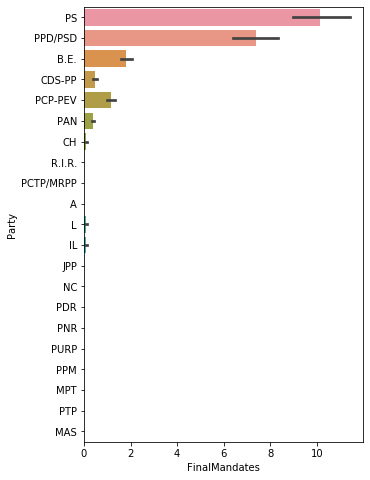

In [5]:
plt.figure(figsize=(5,8))
sns.barplot(y='Party',x='FinalMandates',data=df)
plt.show()
# Only Few Party Names have considerable FinalMandates

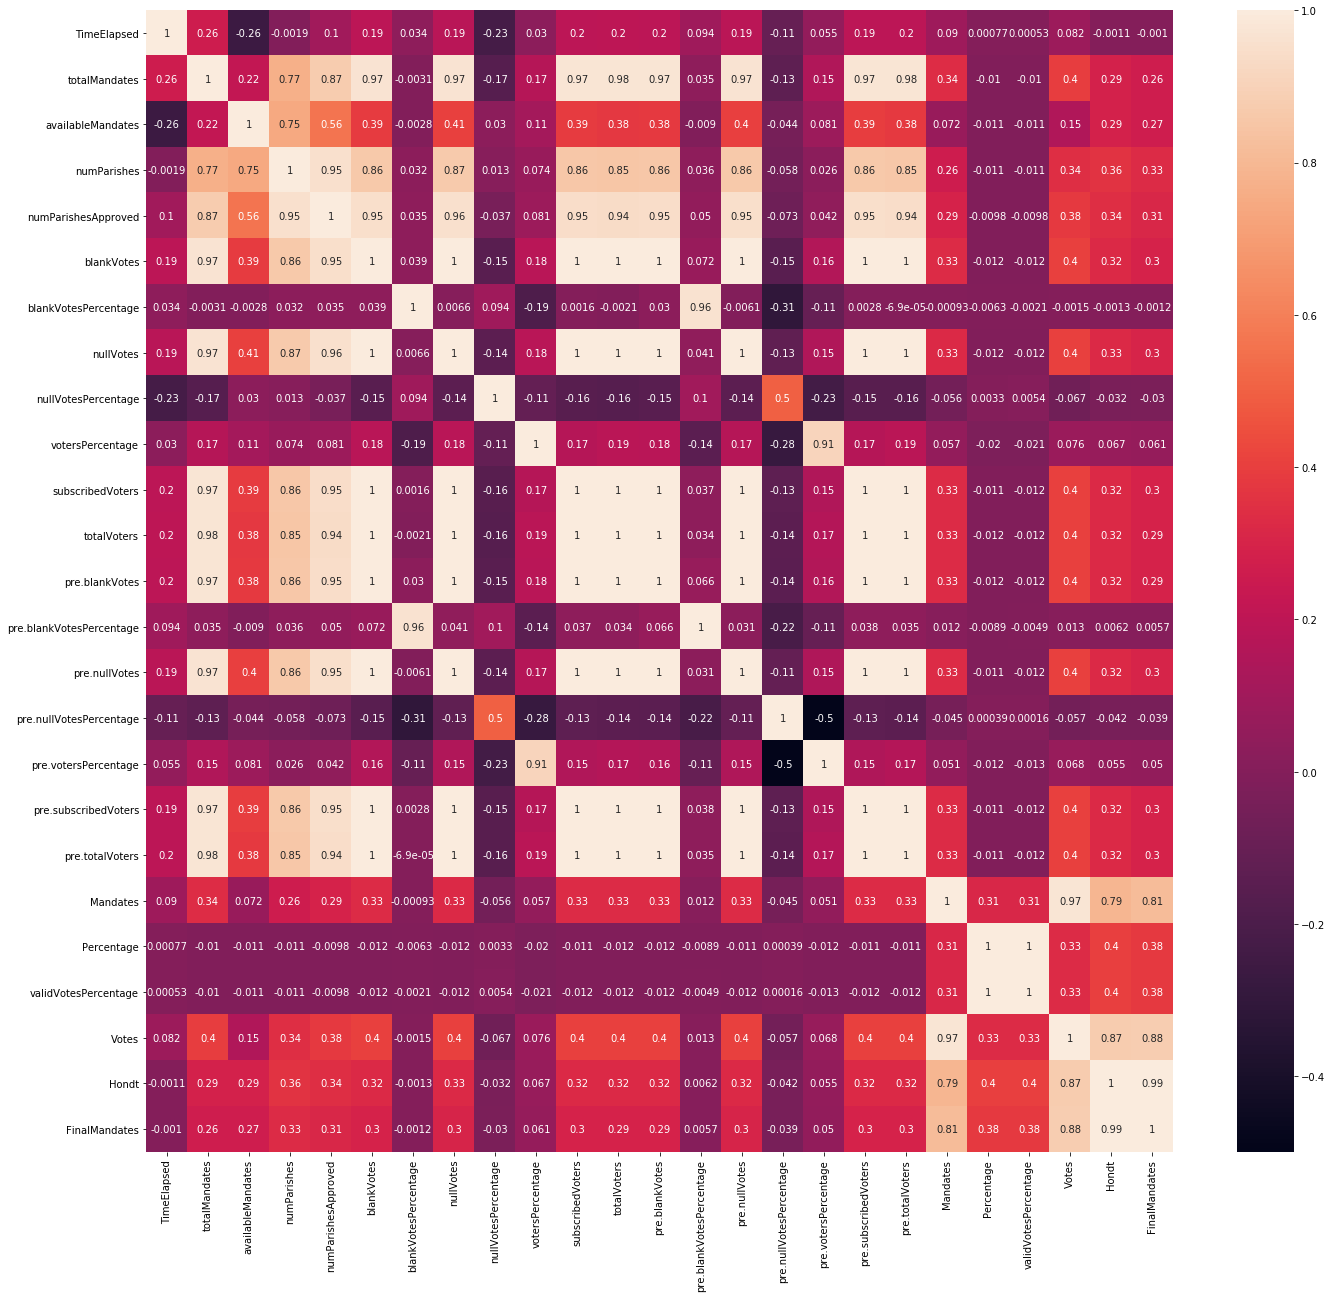

In [6]:
# A lot of features are present as both Numbers and Percentages. We can drop them. Let's first check the correlation heatmap
plt.figure(figsize=(23,21))
sns.heatmap(df.corr(),annot=True)
plt.show()
# Even other than percentages, we see a lot of highly correlated features. Let drop some of them

In [7]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [8]:
# These columns have very high correlation with other features as observed from the heatmap
df.drop(columns=['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters',
         'totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters',
         'Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage'],axis=1,inplace=True)

In [9]:
df.shape

(21643, 14)

In [10]:
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12


In [11]:
df.describe(include='all')

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643,21643,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643,21643.000000,2.164300e+04,21643.000000,21643.000000
unique,NaN,54,21,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN
top,NaN,2019-10-06 22:25:01,Braga,NaN,NaN,NaN,NaN,NaN,NaN,PS,NaN,NaN,NaN,NaN
freq,NaN,403,1134,NaN,NaN,NaN,NaN,NaN,NaN,1127,NaN,NaN,NaN,NaN
mean,133.146052,NaN,NaN,11.499284,309.956013,2.621629,1.961471,51.983722,1.777442,NaN,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,NaN,NaN,31.738783,659.055911,0.795289,0.375250,4.854380,0.388798,NaN,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,NaN,NaN,0.000000,54.000000,0.530000,1.340000,35.980000,1.140000,NaN,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,NaN,NaN,0.000000,75.000000,2.230000,1.720000,50.290000,1.520000,NaN,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,NaN,NaN,3.000000,147.000000,2.640000,1.870000,53.130000,1.690000,NaN,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,NaN,NaN,9.000000,242.000000,2.980000,2.230000,54.550000,1.970000,NaN,3.160000,4.510000e+03,0.000000,0.000000


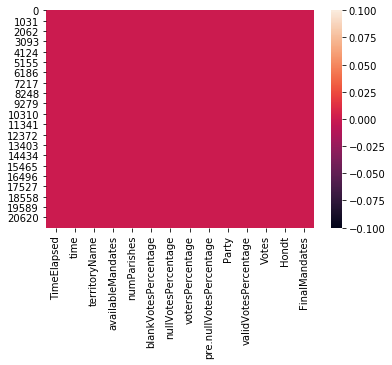

In [12]:
# Let's check null Values
sns.heatmap(df.isnull())
# No Nulls

In [13]:
# Let's view the histplots of the numerical features
# Let's define continous features as cont
cont=[]
for col in df.columns:
    if df[col].dtypes!='O':
        cont.append(col)
cont

['TimeElapsed',
 'availableMandates',
 'numParishes',
 'blankVotesPercentage',
 'nullVotesPercentage',
 'votersPercentage',
 'pre.nullVotesPercentage',
 'validVotesPercentage',
 'Votes',
 'Hondt',
 'FinalMandates']

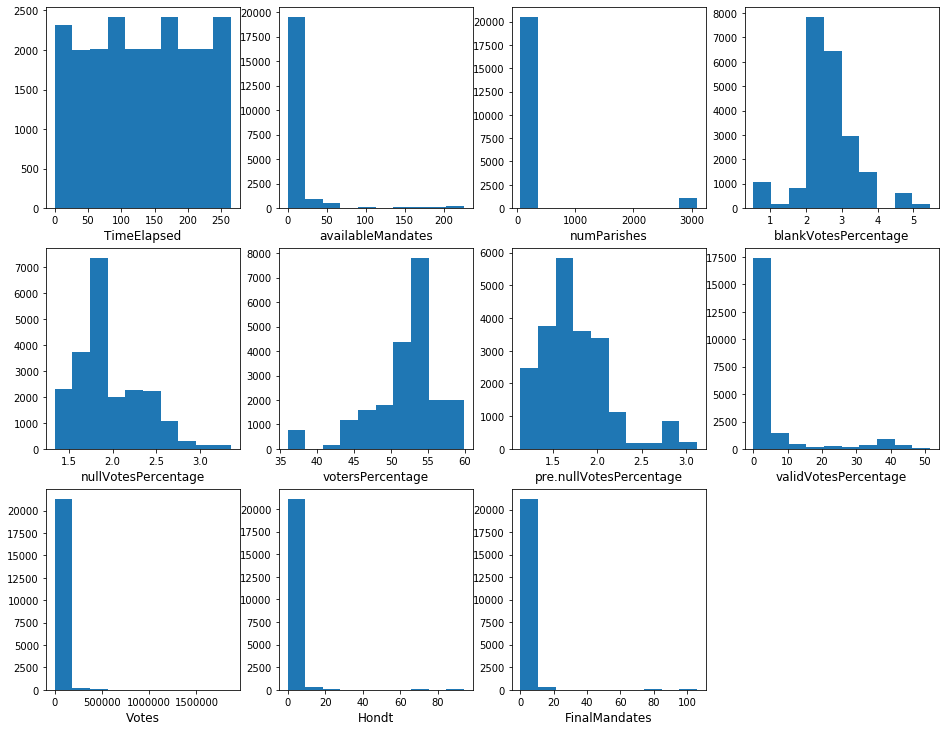

In [14]:
#  SUBPLOTS - FOR Loop
rowCnt = len(cont)
colCnt = 4     # cols
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(16,48))

for i in cont:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    plt.hist(df[i])
    subCnt = subCnt + 1


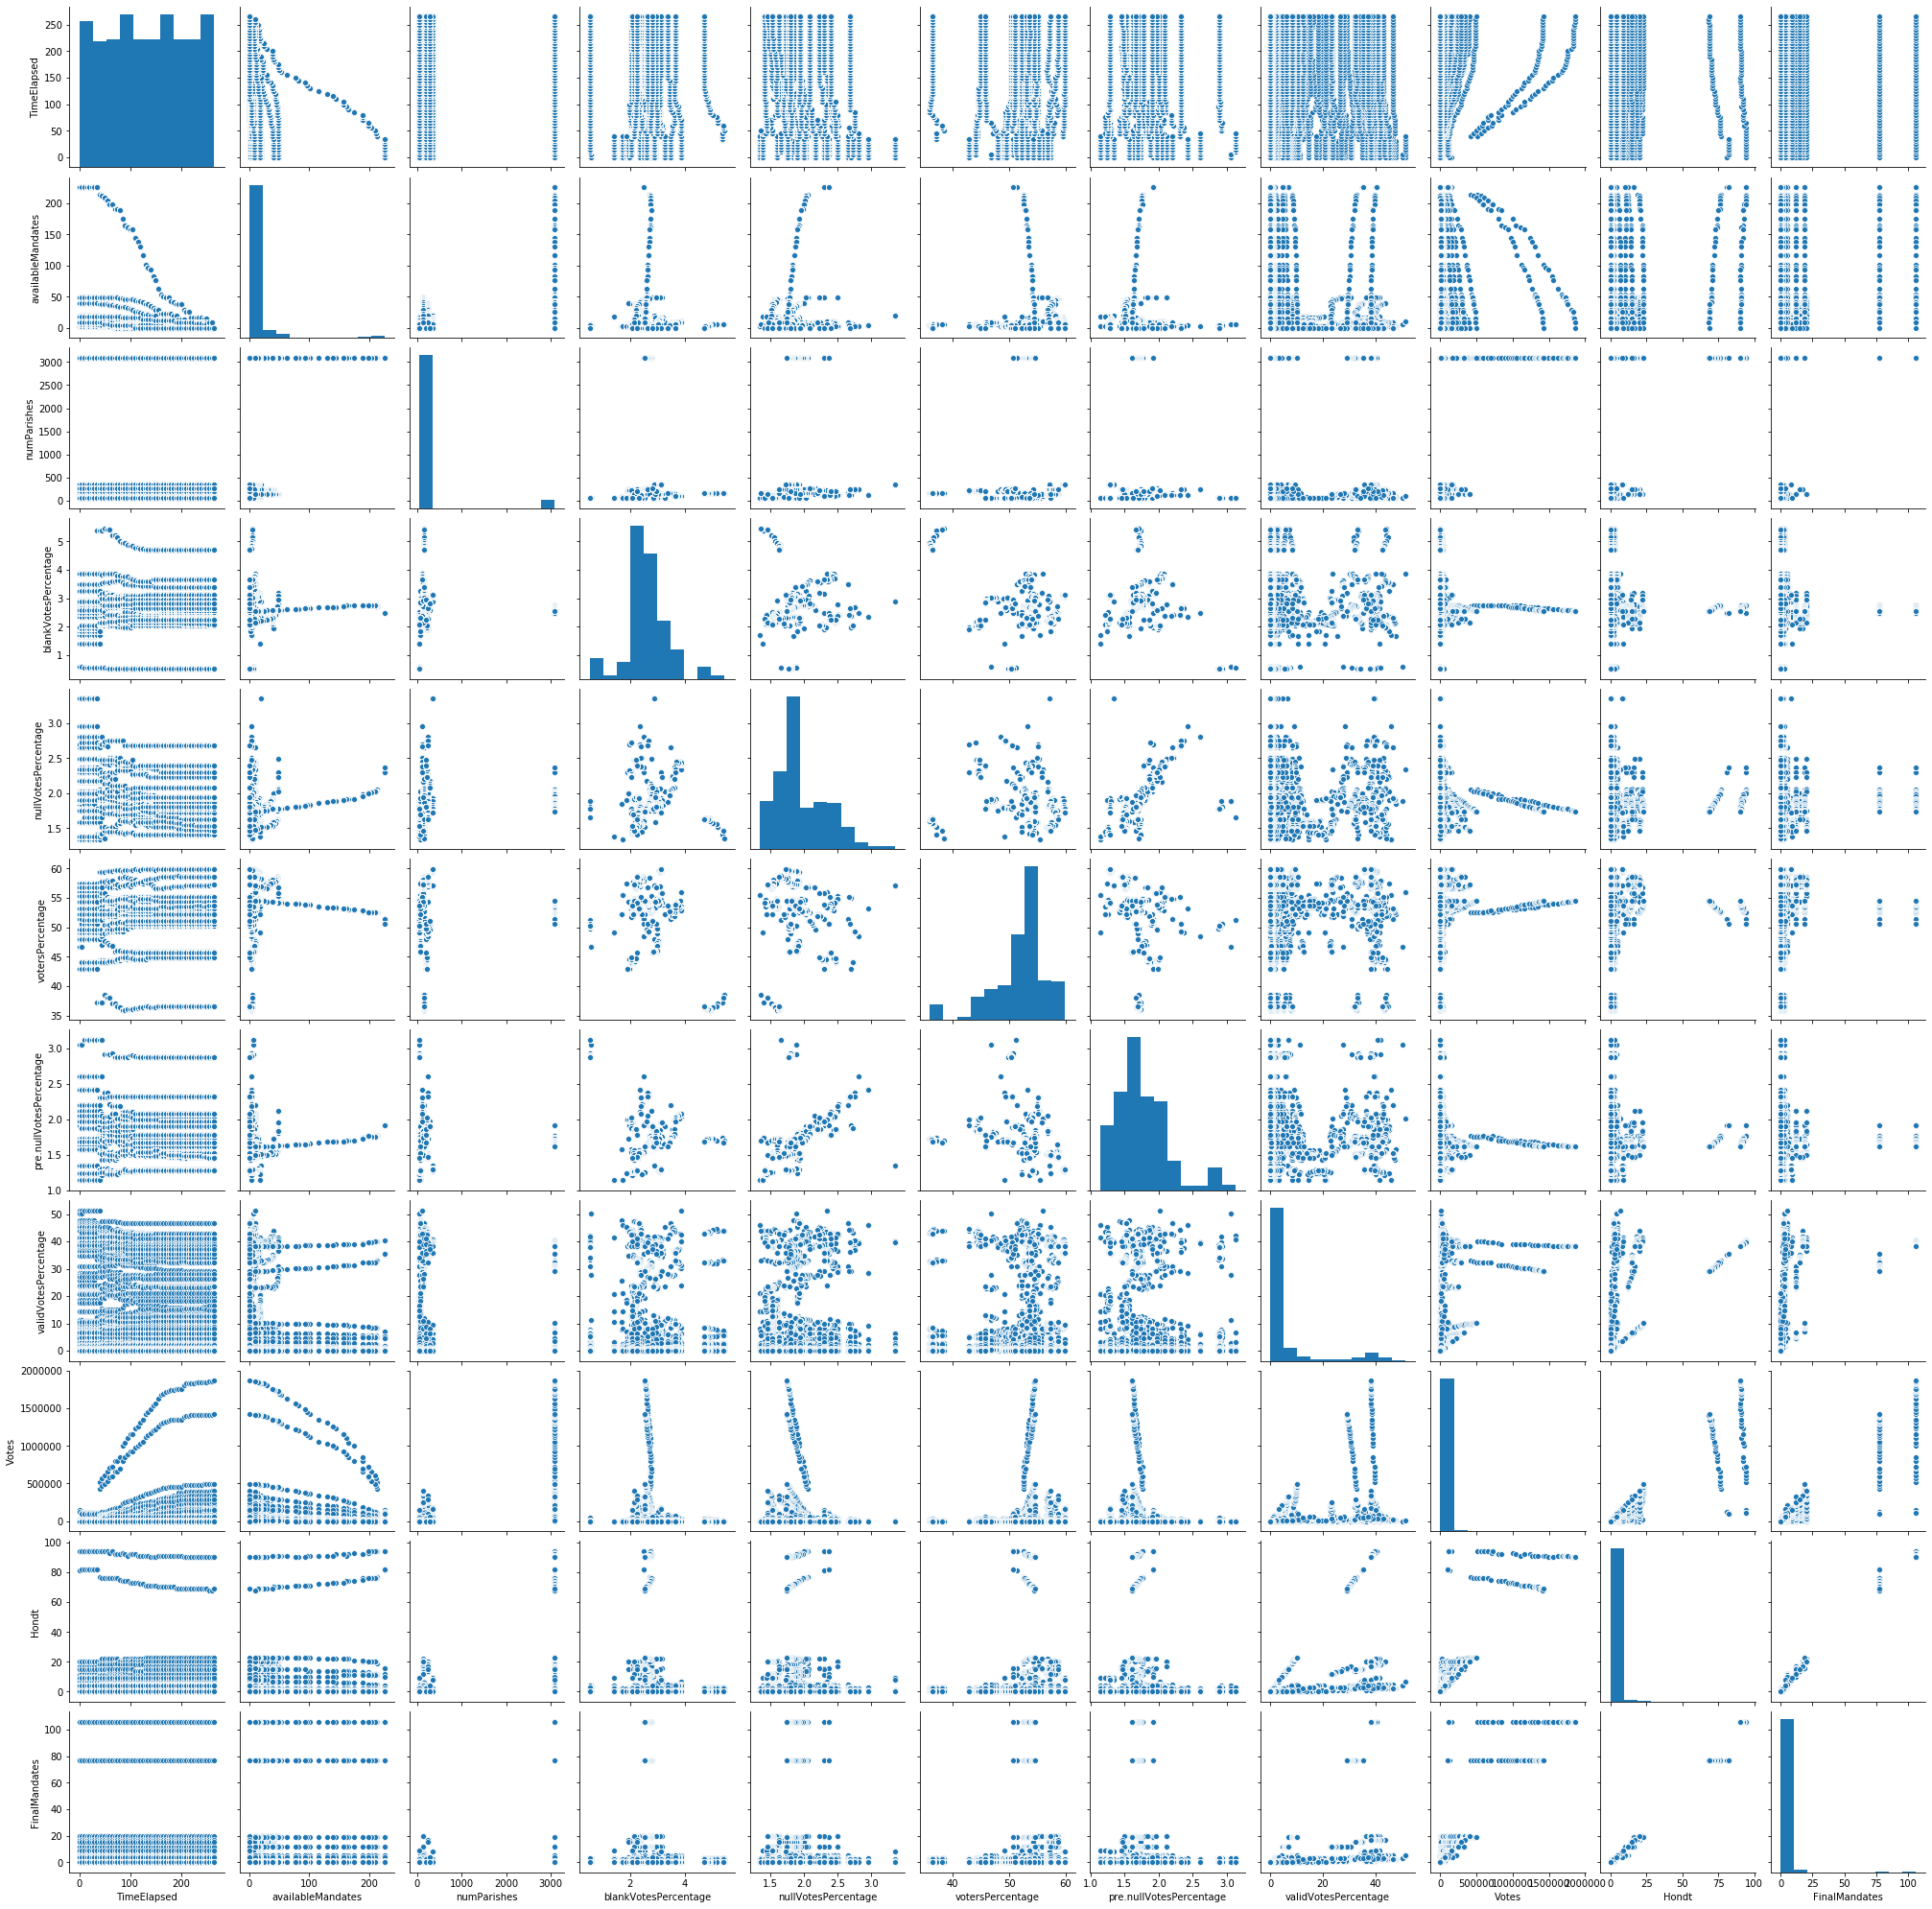

In [15]:
# Let's also see the pairplot
sns.pairplot(df[cont])

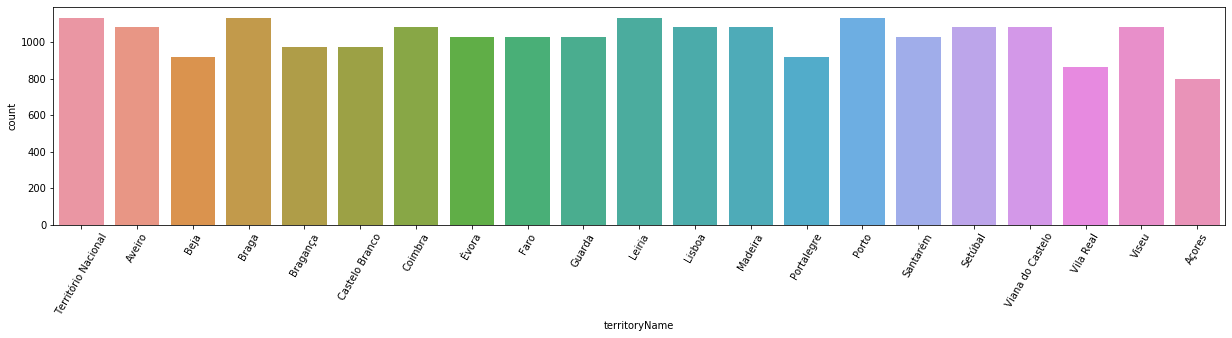

In [16]:
# Let's see the countplots of Categorical Variables
plt.figure(figsize=(21,4))
sns.countplot(df['territoryName'])
plt.xticks(rotation=60)
plt.show()

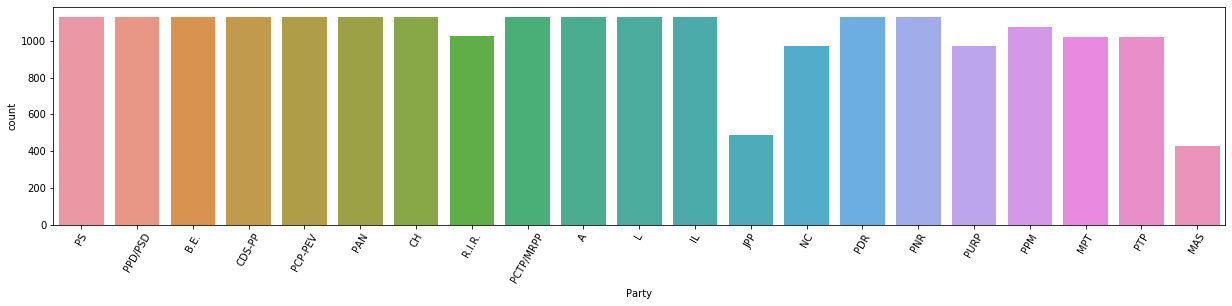

In [17]:
plt.figure(figsize=(21,4))
sns.countplot(df['Party'])
plt.xticks(rotation=60)
plt.show()

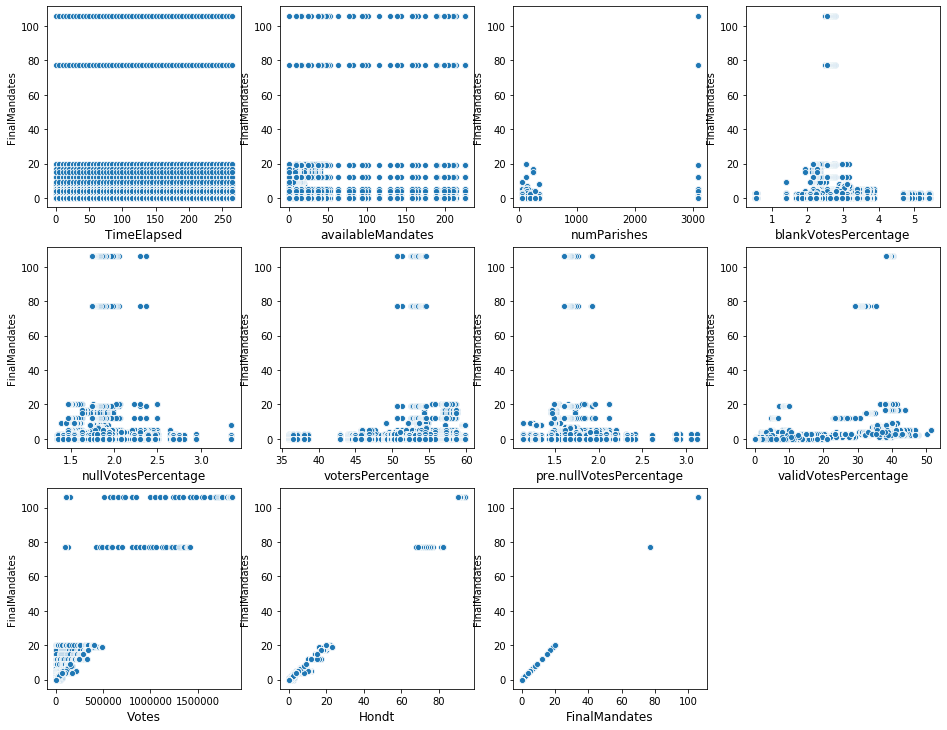

In [18]:
# Let's also look at the scatter plot of nmerical features w.r.t numerical variables
#  SUBPLOTS - FOR Loop
rowCnt = len(cont)
colCnt = 4     # cols
subCnt = 1     # initialize plot number

fig = plt.figure(figsize=(16,48))

for i in cont:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.scatterplot(df[i],df['FinalMandates'])
    subCnt = subCnt + 1


In [19]:
# Let's see the grouped data Party wise:
grp=df.groupby('Party')['blankVotesPercentage','nullVotesPercentage','validVotesPercentage'].mean().sort_values(
    'validVotesPercentage', ascending=False)
grp

# Maximum Valid Vote percentage is in PS and PPD/PSD parties
# Maximum Blank Vote perentage is in MAS
# Null Votes are almost equal for all parties

,blankVotesPercentage,nullVotesPercentage,validVotesPercentage
Party,,,
PS,2.618181,1.965741,39.513789
PPD/PSD,2.618181,1.965741,30.498900
B.E.,2.618181,1.965741,8.941145
PCP-PEV,2.618181,1.965741,6.982227
CDS-PP,2.618181,1.965741,4.674836
PAN,2.618181,1.965741,2.544020
CH,2.618181,1.965741,1.362236
PCTP/MRPP,2.618181,1.965741,0.780195
R.I.R.,2.544834,1.995624,0.763733


In [20]:
# Let's see the territory wise Party Valid Votes
grp2=df.groupby(['territoryName','Party'])['validVotesPercentage'].mean()
grp2.head(100)

territoryName   Party 
Aveiro          A         0.617222
                B.E.      9.799074
                CDS-PP    6.460000
                CH        0.764630
                IL        0.932407
                            ...   
Castelo Branco  CDS-PP    3.967778
                CH        1.316852
                IL        0.553519
                L         0.855000
                MPT       0.244074
Name: validVotesPercentage, Length: 100, dtype: float64

In [21]:
# Let's find the territory and Party with max validVotesPercentage
grp2.idxmax()

('Portalegre', 'PS')

In [22]:
# Let's see the grouped data Territory wise:
grp3=df.groupby('territoryName')['numParishes','availableMandates','blankVotesPercentage','nullVotesPercentage'].mean()
grp3

,numParishes,availableMandates,blankVotesPercentage,nullVotesPercentage
territoryName,,,,
Aveiro,147.0,8.055556,3.022407,1.787593
Açores,156.0,1.680851,4.855106,1.594043
Beja,75.0,0.722222,2.064815,1.721481
Braga,347.0,7.037037,3.076296,1.989074
Bragança,226.0,1.388889,2.027593,2.262963
Castelo Branco,120.0,1.444444,2.392037,2.500185
Coimbra,155.0,3.925926,3.449259,2.078704
Faro,67.0,3.685185,2.939815,1.838333
Guarda,242.0,1.000000,2.617593,2.714259


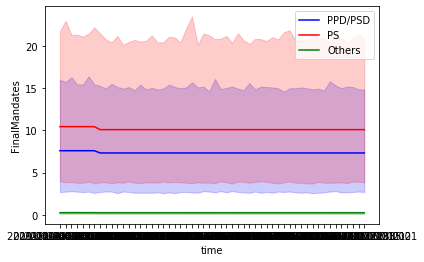

In [23]:
# Let's see the time plot for PS and PPD/PSD as they are the 2 biggest parties
plt.figure()
sns.lineplot(x='time',y='FinalMandates',data=df[df['Party']=='PPD/PSD'],color='blue',label='PPD/PSD')
sns.lineplot(x='time',y='FinalMandates',data=df[df['Party']=='PS'],color='red',label='PS')
sns.lineplot(x='time',y='FinalMandates',data=df[(df['Party']!='PS') & (df['Party']!='PPD/PSD')],color='green',label='Others')
plt.legend()
plt.show()
# The Final Mandates doesn't change much w.r.t. time

In [24]:
# Let's Convert date to datetime
df['Date'] = pd.to_datetime(df['time']).dt.date
df['Time'] = pd.to_datetime(df['time']).dt.time
# Dropping time
df.drop('time',axis=1,inplace=True)

In [25]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Date']=pd.DataFrame(le.fit_transform(df['Date']))
df['Time']=pd.DataFrame(le.fit_transform(df['Time']))

In [26]:
df['territoryName']=pd.DataFrame(le.fit_transform(df['territoryName']))
df['Party']=pd.DataFrame(le.fit_transform(df['Party']))
df.head()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Date,Time
0,0,16,226,3092,2.5,2.3,51.36,1.91,17,40.22,147993,94,106,0,8
1,0,16,226,3092,2.5,2.3,51.36,1.91,15,34.95,128624,81,77,0,8
2,0,16,226,3092,2.5,2.3,51.36,1.91,1,7.15,26307,16,19,0,8
3,0,16,226,3092,2.5,2.3,51.36,1.91,2,5.14,18923,12,5,0,8
4,0,16,226,3092,2.5,2.3,51.36,1.91,11,4.83,17757,11,12,0,8


In [27]:
#Treating for outliers
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)

# A lot of rows removed.

(21643, 15)
(18344, 15)


In [29]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["FinalMandates"])
y=df[["FinalMandates"]]

In [33]:
# Let's do Standard Scaling on the variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,Date,Time
0,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,1.177506,4.579409,-0.186693,4.423523,-0.422273,-1.205361
1,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,-1.435865,0.637269,-0.272969,0.426424,-0.422273,-1.205361
2,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,-1.272529,0.442475,-0.277255,0.426424,-0.422273,-1.205361
3,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,0.197492,-0.108276,-0.289307,-0.239759,-0.422273,-1.205361
4,-1.752388,-1.742046,0.979924,-0.099866,0.540744,-1.043593,0.184517,-0.375381,0.034156,-0.158726,-0.290416,-0.239759,-0.422273,-1.205361


# Modelling

In [35]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [36]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [37]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  69  is  0.991162920299827


In [39]:
# KNN Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 2}

In [40]:
knr=KNeighborsRegressor(n_neighbors=3)
# Taking odd
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  45  is  0.9997314391761052


# Cross Validation

In [42]:
print("\n\nLinear Regression\n\n")
model_evaluation(lr,x,y)


print("\n\nKNeighborsRegressor\n\n")
model_evaluation(knr,x,y)




Linear Regression


Mean r2 score for regressor:  -8.150332673941358e+23
standard deviation in r2 score for regressor:  1.6300665347882715e+24
[ 9.60880257e-01  9.84893361e-01  9.95607598e-01  9.99445064e-01
 -4.07516634e+24]


KNeighborsRegressor


Mean r2 score for regressor:  0.9838799722555045
standard deviation in r2 score for regressor:  0.027858517936236452
[0.92827523 0.9949925  0.9968905  0.99924163 1.        ]


In [43]:
# Based on above results let's select KNN

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 45,test_size=0.20)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)

In [44]:
#Lets find the rmse and r2_score using sklearn.metrics for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.026391787602648847
r2_score is:  0.9997314391761052


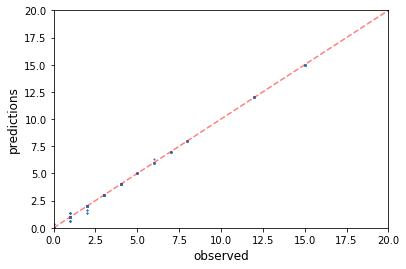

In [46]:
plt.scatter(y_test,y_pred,alpha=1, s=1)
plt.xlabel('observed', fontsize=12)
plt.ylabel('predictions', fontsize=12)
plt.plot([0,(np.max(y_test) + 5000)],[0,(np.max(y_test) + 5000)], 'r--', alpha=0.5)
plt.axis([0,20,0,20])
plt.show()

In [47]:
import joblib
joblib.dump(knr,'Election.pkl')

['Election.pkl']